<a href="https://colab.research.google.com/github/ManshaP/CCEES/blob/master/exercise_2/1_second_iterate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 2

In [0]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## 1. Second Iterate

Logistic map:
\begin{align*}
f(u_i)=u_{i+1} = \mu\ u_i\ (1-u_i)
\end{align*}

Second iterate of te logistic map:
\begin{align*}
f^2(u)  =f \left( f\left(u\right) \right) = \mu^2 \ u \ (1-u)\ \left[ 1-\mu\ u \ (1-u) \right]
\end{align*}

New map:
\begin{align*}
u_{i+1}  = f^2(u_i)
\end{align*}

### a)

### b)

In [0]:
# define logistic map

def logistic_map(u, mu):
    return mu * u * (1 - u)

# # define new map with second iterate

# def second_iterate_map(u, mu):
#     return mu**2 * u * (1 - u) * (1 - mu * u * (1 - u))

# define generic nth iterate map

def n_iterate_map(n, u, mu):
    current_u = u
    for i in np.arange(1, n+1):
        current_u = logistic_map(current_u, mu)
    return current_u

In [0]:
# calculate with given parameters

mus = [-1, 0, 1, 2, 3, 4, 5]
u_range = np.linspace(0, 2, 200)

def logistic_iterates(u, mus, n=2):
    sim = {}
    for mu in mus:
        iterates = {}
        for i in np.arange(1, n+1):
            nth_iterate = n_iterate_map(n, u, mu)
            iterates[i] = nth_iterate
        sim[mu] = iterates
    return sim

sim = logistic_iterates(u_range, mus, 3)

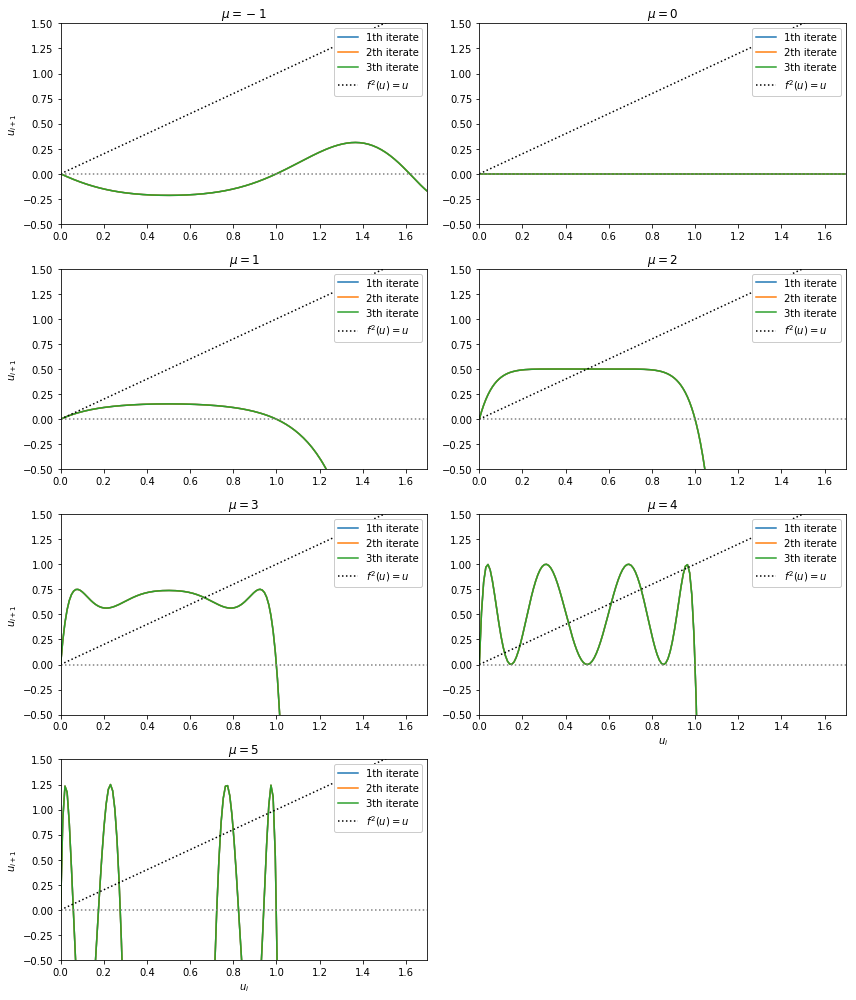

In [98]:
# plot results

n_mu = len(sim)

fig = plt.figure()

axs = []
for i in range(n_mu):
    row = i//2
    col = int(i%2)
    axs.append(plt.subplot2grid((n_mu//2+1, 2), (row, col)))

for i, mu in enumerate(sim.keys()):
    for n, f in sim[mu].items():
        axs[i].plot(u_range, f, label='{}th iterate'.format(n))
    axs[i].plot(u_range, u_range, color='k', linestyle=':', label=r'$f^2(u)=u$')
    axs[i].plot(u_range, np.zeros(len(u_range)), color='.5', linestyle=':')
    
    axs[i].legend(framealpha=1, loc=1)
    if i%2 == 0:
        axs[i].set_ylabel(r'$u_{i+1}$')
    axs[i].set_title(r'$\mu = {}$'.format(mu))
    
    axs[i].set_xlim(0., 1.7)
    axs[i].set_ylim(-.5, 1.5)

axs[-1].set_xlabel(r'$u_i$')
if n_mu > 1:
    axs[-2].set_xlabel(r'$u_i$')

fig.set_size_inches(12, n_mu*2)
fig.tight_layout()
plt.show()